In [0]:
!wget https://github.com/Horea94/Fruit-Images-Dataset/archive/master.zip

--2020-02-17 08:51:12--  https://github.com/Horea94/Fruit-Images-Dataset/archive/master.zip
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/master [following]
--2020-02-17 08:51:12--  https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [             <=>    ] 724.52M  25.3MB/s    in 34s     

2020-02-17 08:51:47 (21.2 MB/s) - ‘master.zip’ saved [759713127]



In [0]:
!unzip master.zip

Streaming output truncated to the last 5000 lines.
  inflating: Fruit-Images-Dataset-master/Training/Tangelo/r_206_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tangelo/r_207_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tangelo/r_208_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tangelo/r_209_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tangelo/r_20_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tangelo/r_210_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tangelo/r_211_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tangelo/r_212_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tangelo/r_213_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tangelo/r_214_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tangelo/r_215_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tangelo/r_216_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tangelo/r_21

In [0]:
# Importing the Keras libraries and packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data visulation
import glob # For including images
import cv2 # OpenCV 
import tensorflow.compat.v2 as tf 
import datetime
import os
from tensorflow.compat.v2 import keras
from tensorflow.keras.models import Sequential # Tensorflow high-level api
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout


In [0]:
# Import training dataset
training_fruit_img = []
training_label = []
for dir_path in glob.glob("Fruit-Images-Dataset-master/Training/*"):
    img_label = dir_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        training_fruit_img.append(img)
        training_label.append(img_label)
training_fruit_img = np.array(training_fruit_img)
training_label = np.array(training_label)
len(np.unique(training_label))

120

In [0]:
# Import test dataset
test_fruit_img = []
test_label = []
for dir_path in glob.glob("Fruit-Images-Dataset-master/Test/*"):
    img_label = dir_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        test_fruit_img.append(img)
        test_label.append(img_label)
test_fruit_img = np.array(test_fruit_img)
test_label = np.array(test_label)
len(np.unique(test_label))

120

In [0]:
label_to_id = {v : k for k, v in enumerate(np.unique(training_label))}
id_to_label = {v : k for k, v in label_to_id.items()}

In [0]:
training_label_id = np.array([label_to_id[i] for i in training_label])
test_label_id = np.array([label_to_id[i] for i in test_label])
test_label_id

array([117, 117, 117, ...,  16,  16,  16])

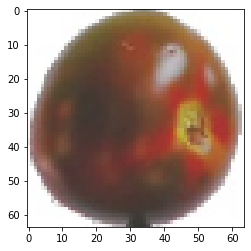

In [0]:
training_fruit_img, test_fruit_img = training_fruit_img / 255.0, test_fruit_img / 255.0 
plt.imshow(training_fruit_img[0])

In [0]:
def create_model():
  return keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=2, input_shape = (64, 64, 3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(120, activation='softmax')

  ])


model = create_model()

model.summary()


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 63, 63, 64)        832       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 61504)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               15745280  
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 120)               30840     
Total params: 15,776,952
Trainable params: 15,776,952
Non-trainable params: 0
_________________________________________

In [0]:
!rm -vrf logs/fit/
log_dir="logs/fit/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=training_fruit_img, 
          y=training_label_id, 
          batch_size = 128, 
          epochs = 25, 
          callbacks = [tensorboard_callback],
          validation_data=(test_fruit_img, test_label_id),)

removed 'logs/fit/validation/events.out.tfevents.1581935771.83f8272d34e5.122.9143.v2'
removed directory 'logs/fit/validation'
removed 'logs/fit/train/events.out.tfevents.1581935759.83f8272d34e5.122.9085.v2'
removed directory 'logs/fit/train'
removed directory 'logs/fit/'
Train on 61488 samples, validate on 20622 samples
Epoch 1/25
61488/61488 [==============================] - 11s 181us/sample - loss: 0.0980 - acc: 0.9707 - val_loss: 0.3064 - val_acc: 0.9579
Epoch 2/25
61488/61488 [==============================] - 11s 175us/sample - loss: 0.0924 - acc: 0.9722 - val_loss: 0.2902 - val_acc: 0.9592
Epoch 3/25
61488/61488 [==============================] - 11s 175us/sample - loss: 0.0995 - acc: 0.9711 - val_loss: 0.2880 - val_acc: 0.9581
Epoch 4/25
61488/61488 [==============================] - 11s 174us/sample - loss: 0.0943 - acc: 0.9716 - val_loss: 0.3022 - val_acc: 0.9561
Epoch 5/25
61488/61488 [==============================] - 11s 174us/sample - loss: 0.0901 - acc: 0.9736 - val_loss

In [0]:
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 945), started 0:43:58 ago. (Use '!kill 945' to kill it.)

In [0]:
%reload_ext tensorboard
%tensorboard --logdir logs/fit

In [0]:
loss, accuracy = model.evaluate(test_fruit_img, test_label_id)
print("\n\nLoss:", loss)
print("Accuracy:", accuracy)
model.save("model.h5")

20622/20622 [==============================] - 3s 141us/sample - loss: 0.4590 - acc: 0.9491


Loss: 0.4590080525084807
Accuracy: 0.94913197
